In [16]:
import networkx as nx
import pandas as pd

nodes_df = pd.read_csv('marvel-unimodal-nodes.csv')
edges_df = pd.read_csv("marvel-unimodal-edges.csv")

G = nx.from_pandas_edgelist(edges_df, source='Source', target='Target', edge_attr='Weight')

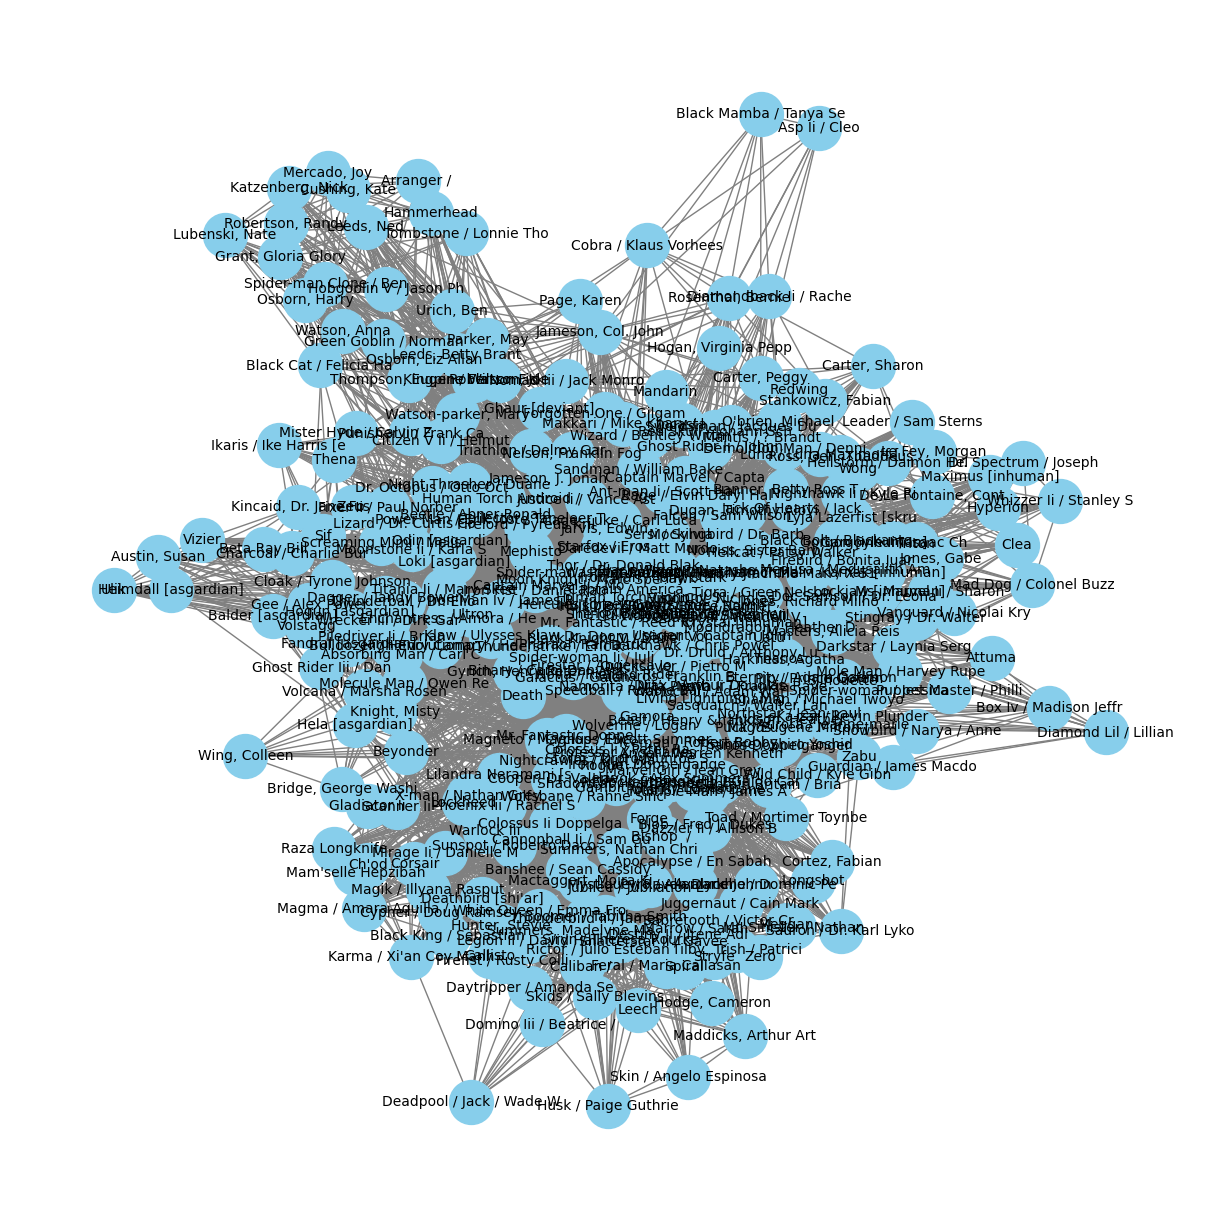

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=10, node_size=1000, node_color='skyblue', edge_color='gray')
plt.show()

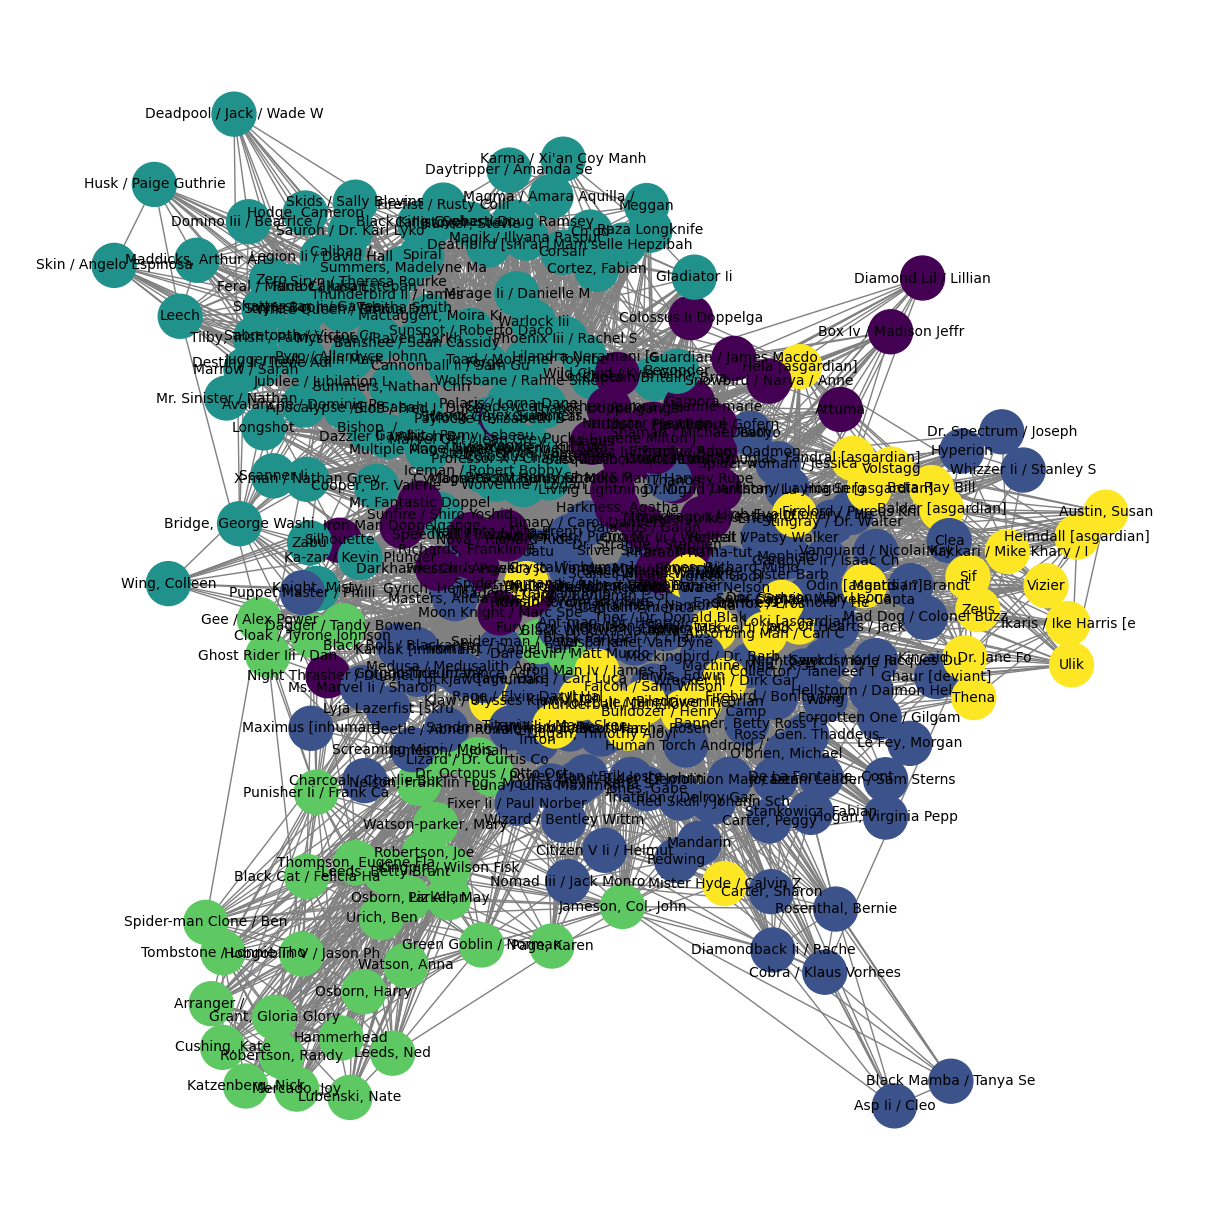

In [18]:
from networkx.algorithms import community

# Compute the best partition
communities = community.louvain_communities(G, seed=123)

# Create a dictionary that maps each node to its community
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i

# Create a list of colors based on the community of each node
colors = [community_map[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G,  node_color=colors, with_labels=True, font_size=10, node_size=1000, edge_color='gray')
plt.show()